In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_adm = pd.read_csv('ADMISSIONS.csv')


In [2]:
print(df_adm.size,len(df_adm))

1120544 58976


In [3]:
df_adm.isnull().sum()


ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

In [4]:
df_adm['DEATHTIME'].count()


5854

In [5]:
df_adm.DEATHTIME = pd.to_datetime(df_adm.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')


In [6]:
df_adm.count()


ROW_ID                  58976
SUBJECT_ID              58976
HADM_ID                 58976
ADMITTIME               58976
DISCHTIME               58976
DEATHTIME                5854
ADMISSION_TYPE          58976
ADMISSION_LOCATION      58976
DISCHARGE_LOCATION      58976
INSURANCE               58976
LANGUAGE                33644
RELIGION                58518
MARITAL_STATUS          48848
ETHNICITY               58976
EDREGTIME               30877
EDOUTTIME               30877
DIAGNOSIS               58951
HOSPITAL_EXPIRE_FLAG    58976
HAS_CHARTEVENTS_DATA    58976
dtype: int64

In [7]:
53122/58976


0.9007392837764514

In [8]:
pd.isna(df_adm['DEATHTIME'])


0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9        False
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
58946     True
58947     True
58948     True
58949     True
58950     True
58951     True
58952     True
58953     True
58954     True
58955     True
58956     True
58957    False
58958     True
58959     True
58960     True
58961     True
58962     True
58963     True
58964     True
58965     True
58966    False
58967     True
58968     True
58969     True
58970    False
58971     True
58972    False
58973     True
58974     True
58975     True
Name: DEATHTIME, Length: 58976, dtype: bool

In [9]:
df_adm = df_adm[pd.isna(df_adm['DEATHTIME'])]

In [10]:
df_adm.count()


ROW_ID                  53122
SUBJECT_ID              53122
HADM_ID                 53122
ADMITTIME               53122
DISCHTIME               53122
DEATHTIME                   0
ADMISSION_TYPE          53122
ADMISSION_LOCATION      53122
DISCHARGE_LOCATION      53122
INSURANCE               53122
LANGUAGE                30603
RELIGION                52761
MARITAL_STATUS          43655
ETHNICITY               53122
EDREGTIME               26792
EDOUTTIME               26792
DIAGNOSIS               53098
HOSPITAL_EXPIRE_FLAG    53122
HAS_CHARTEVENTS_DATA    53122
dtype: int64

In [11]:
df_adm = df_adm.drop(['DEATHTIME'],axis=1)

In [12]:
df_adm.count()


ROW_ID                  53122
SUBJECT_ID              53122
HADM_ID                 53122
ADMITTIME               53122
DISCHTIME               53122
ADMISSION_TYPE          53122
ADMISSION_LOCATION      53122
DISCHARGE_LOCATION      53122
INSURANCE               53122
LANGUAGE                30603
RELIGION                52761
MARITAL_STATUS          43655
ETHNICITY               53122
EDREGTIME               26792
EDOUTTIME               26792
DIAGNOSIS               53098
HOSPITAL_EXPIRE_FLAG    53122
HAS_CHARTEVENTS_DATA    53122
dtype: int64

In [13]:
# convert to dates
df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
df_adm.DISCHTIME = pd.to_datetime(df_adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [14]:
# sort by subject_ID and admission date
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])
df_adm = df_adm.reset_index(drop = True)

In [15]:
df_adm


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1
5,6,7,118037,2121-05-23 15:05:00,2121-05-27 11:57:00,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
6,7,8,159514,2117-11-20 10:22:00,2117-11-24 14:20:00,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,CATHOLIC,NaN,WHITE,NaN,NaN,NEWBORN,0,1
7,9,10,184167,2103-06-28 11:36:00,2103-07-06 12:10:00,NEWBORN,PHYS REFERRAL/NORMAL DELI,SHORT TERM HOSPITAL,Medicaid,NaN,UNOBTAINABLE,NaN,BLACK/AFRICAN AMERICAN,NaN,NaN,NEWBORN,0,1
8,10,11,194540,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,NaN,OTHER,MARRIED,WHITE,2178-04-15 20:46:00,2178-04-16 06:53:00,BRAIN MASS,0,1
9,12,13,143045,2167-01-08 18:43:00,2167-01-15 15:15:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicaid,NaN,OTHER,NaN,WHITE,NaN,NaN,CORONARY ARTERY DISEASE,0,1


In [16]:
# add the next admission date and type for each subject using groupby
df_adm['NEXT_ADMITTIME'] = df_adm.groupby('SUBJECT_ID').ADMITTIME.shift(-1)

# get the next admission type
df_adm['NEXT_ADMISSION_TYPE'] = df_adm.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

In [17]:
# get rows where next admission is elective and replace with naT or nan
rows = df_adm.NEXT_ADMISSION_TYPE == 'ELECTIVE'
df_adm.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
df_adm.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN

In [18]:
# sort by subject_ID and admission date
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])

# back fill (this will take a little while)
df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

In [19]:
df_adm
print(df_adm.size)

1062440


In [20]:
df_adm['DAYS_NEXT_ADMIT']=  (df_adm.NEXT_ADMITTIME - df_adm.DISCHTIME).dt.total_seconds()/(24*60*60)


In [21]:
readmits = df_adm[pd.notnull(df_adm['DAYS_NEXT_ADMIT'])]


In [22]:
readmits.count()

ROW_ID                  9934
SUBJECT_ID              9934
HADM_ID                 9934
ADMITTIME               9934
DISCHTIME               9934
ADMISSION_TYPE          9934
ADMISSION_LOCATION      9934
DISCHARGE_LOCATION      9934
INSURANCE               9934
LANGUAGE                6914
RELIGION                9916
MARITAL_STATUS          9623
ETHNICITY               9934
EDREGTIME               6590
EDOUTTIME               6590
DIAGNOSIS               9922
HOSPITAL_EXPIRE_FLAG    9934
HAS_CHARTEVENTS_DATA    9934
NEXT_ADMITTIME          9934
NEXT_ADMISSION_TYPE     9934
DAYS_NEXT_ADMIT         9934
dtype: int64

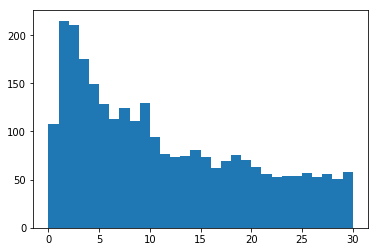

In [23]:
data_hist = plt.hist(list(readmits['DAYS_NEXT_ADMIT']),bins=30,range=(0,30))

In [24]:
data_hist[0]

array([108., 215., 211., 175., 149., 129., 113., 124., 111., 130.,  94.,
        77.,  73.,  75.,  81.,  73.,  62.,  69.,  76.,  70.,  63.,  56.,
        53.,  54.,  54.,  57.,  53.,  56.,  51.,  58.])

(array([2360., 3930., 4712., 5246., 5683., 6010., 6279., 6511., 6754.,
        6941., 7141., 7300., 7449., 7589., 7740., 7848., 7942., 8047.,
        8137., 8225., 8289., 8369., 8440., 8511., 8572., 8648., 8711.,
        8778., 8832., 8877., 8919., 8975., 9020., 9065., 9113., 9153.,
        9183., 9218., 9252., 9288., 9317., 9341., 9364., 9382., 9409.,
        9445., 9460., 9487., 9511., 9525., 9552., 9576., 9597., 9622.,
        9641., 9657., 9673., 9688., 9708., 9723., 9735., 9748., 9757.,
        9765., 9772., 9780., 9788., 9793., 9799., 9812., 9819., 9828.,
        9830., 9838., 9846., 9855., 9863., 9867., 9874., 9883., 9884.,
        9889., 9894., 9898., 9902., 9903., 9909., 9909., 9912., 9916.,
        9919., 9921., 9923., 9926., 9928., 9929., 9932., 9932., 9933.,
        9934.]),
 array([ -18.76527778,   22.5020625 ,   63.76940278,  105.03674306,
         146.30408333,  187.57142361,  228.83876389,  270.10610417,
         311.37344444,  352.64078472,  393.908125  ,  435.17546528

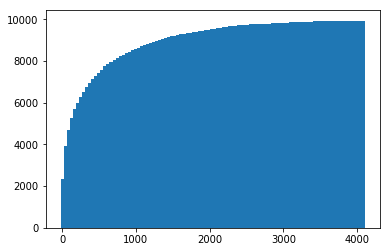

In [25]:
plt.hist(list(readmits['DAYS_NEXT_ADMIT']),bins=100,cumulative=True)

In [26]:
4475/9934

0.45047312260922084

In [27]:
df_notes = pd.read_csv("only_discharge_summaries.csv")

In [28]:
df_notes['TEXT'][0]


'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [29]:
df_nurse = pd.read_csv("only_nursing_notes.csv")


In [30]:
df_nurse['TEXT'][0]

'67M w/ h/o multiplemyeloma Dx [**2111**], neuropathy, bed-bound, cared for by\n   Dr [**Last Name (STitle) 731**] at [**Company 732**], last seen at [**Hospital1 54**] in [**2112**], a/w GIB. Pt was in\n   USH at nursing home when maroon stools were noted by staff members.\n   Patient himself was unaware of rectal bleeding. He denies GI symptoms.\n   He reports slight lightheadedness. He was transferred from NH to [**Hospital1 **] ED\n   where his HCT was 17.6 and plts 45, his NGT lavage was neg, he was\n   given 2 units of PRBCs and 6 bags of plts.\n   Gastrointestinal bleed, lower (Hematochezia, BRBPR, GI Bleed, GIB)\n   Assessment:\n   Pt required as additional 2 units of blood when he arrived in the MICU\n   because his HCT only bumped to 19.8 after the 2 units if PRBCs that he\n   received in the EW and an additional 2 bags of plt for a plt count of\n   55.  He had an EGD [**2115-2-6**], no bleeding was noted.  He has had 4 liters\n   of golytley and will have a colonoscopy [**2-

In [31]:
print(len(df_adm),len(df_notes))
#assert df_notes.duplicated(['SUBJECT_ID']).sum() == 0,'Multiple discharge summaries' 

53122 59652


In [32]:
assert df_nurse.duplicated(['HADM_ID']).sum() ==0,'Multiple discharge summaries'

AssertionError: Multiple discharge summaries

In [33]:
df_notes_last = (df_notes.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
assert df_notes_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

In [34]:
len(df_notes)

59652

In [35]:
df_adm_notes = pd.merge(df_adm[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DAYS_NEXT_ADMIT','NEXT_ADMITTIME','ADMISSION_TYPE']],
                        df_notes_last[['SUBJECT_ID','HADM_ID','TEXT']], 
                        on = ['SUBJECT_ID','HADM_ID'],
                        how = 'left')
#assert len(df_adm) == len(df_adm_notes), 'Number of rows increased'

In [36]:
print(df_adm.size,df_adm_notes.size,len(df_adm),len(df_adm))
#assert df_adm_notes.duplicated(['SUBJECT_ID']).sum() == 0, 'Multiple discharge summaries per admission'

1115562 424976 53122 53122


In [37]:
df_adm_notes.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/df_adm_notes.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.048076
EMERGENCY    0.028550
NEWBORN      0.540700
URGENT       0.028936
dtype: float64

In [38]:
#drop newborn admission type
df_adm_notes = df_adm_notes.drop(df_adm_notes[df_adm_notes.ADMISSION_TYPE=='NEWBORN'].index)


In [39]:
df_adm_notes['OUTPUT_LABEL'] = (df_adm_notes.DAYS_NEXT_ADMIT <= 30).astype('int')

In [40]:
len(df_adm_notes['OUTPUT_LABEL'])

45321

In [41]:
df_adm_notes[df_adm_notes['OUTPUT_LABEL']==1].count()

SUBJECT_ID         2549
HADM_ID            2549
ADMITTIME          2549
DISCHTIME          2549
DAYS_NEXT_ADMIT    2549
NEXT_ADMITTIME     2549
ADMISSION_TYPE     2549
TEXT               2496
OUTPUT_LABEL       2549
dtype: int64

In [42]:
df_adm_notes[df_adm_notes['OUTPUT_LABEL']==0].count()

SUBJECT_ID         42772
HADM_ID            42772
ADMITTIME          42772
DISCHTIME          42772
DAYS_NEXT_ADMIT     7156
NEXT_ADMITTIME      7156
ADMISSION_TYPE     42772
TEXT               41384
OUTPUT_LABEL       42772
dtype: int64

In [43]:
# shuffle the samples
df_adm_notes = df_adm_notes.sample(n = len(df_adm_notes), random_state = 42)
df_adm_notes = df_adm_notes.reset_index(drop = True)
df_class = df_adm_notes['OUTPUT_LABEL']
df_adm_notes = df_adm_notes.drop(columns=['OUTPUT_LABEL'],axis=1)
print(len(df_class),len(df_adm_notes))
from sklearn.model_selection import train_test_split
df_train,df_test,df_train_class,df_test_class = train_test_split(df_adm_notes,df_class,test_size=0.3,random_state=42)
print(len(df_train),(len(df_train_class)))

45321 45321
31724 31724


In [44]:
from imblearn.over_sampling import SVMSMOTE


In [62]:
def preprocess_text(df):
    # This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT = df.TEXT.str.replace('\n',' ')
    df.TEXT = df.TEXT.str.replace('\r',' ')
    #punc_list = string.punctuation+'0123456789'
    #t = str.maketrans(dict.fromkeys(punc_list, " "))
    #text = text.lower().translate(t)
    #Find how to remove punctuation marks as well
    return df

In [63]:
import nltk
from nltk import word_tokenize
#from nltk.corpus import stopwords
import string

In [64]:
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

In [65]:
df_train = preprocess_text(df_train)
df_test = preprocess_text(df_test)

/home/user/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [49]:
#df_text = [i.split() for i in df_train['TEXT']+df_test['TEXT']]
#df_text = df_text.append([i.split() for i in df_train['TEXT']])
#df_text_test=reduce(lambda x,y :x+y,df_text)
text = list(df_train['TEXT'])+list(df_test['TEXT'])
test_text = [i.split() for i in text]

In [50]:
import itertools
from collections import Counter
words = Counter(i for i in list(itertools.chain.from_iterable(test_text)))

In [51]:
freq50 = words.most_common(60)

['and', 'the', 'to', 'of', 'was', 'with', 'a', 'on', 'for', 'in', 'mg', 'is', 'Tablet', 'PO', 'The', '(1)', 'or', 'Sig:', 'no', 'as', 'at', 'Name', '**]', 'patient', '-', 'One', '.', 'BLOOD', 'He', 'Discharge', 'were', 'No', 'his', 'She', 'left', '[**Last', 'had', 'be', 'her', 'your', 'not', 'by', 'he', 'that', 'right', 'from', 'an', 'are', 'have', 'she', 'but', 'which', 'has', 'this', 'There', 'day', '[**Hospital1', 'times', '1.', 'you'] [1347609, 1178941, 1153099, 1096568, 1023887, 802613, 708195, 606730, 602583, 601793, 486528, 443759, 398370, 354794, 340043, 330000, 329794, 327503, 314780, 297839, 290494, 284927, 284823, 278730, 253624, 248424, 232036, 227365, 221868, 211247, 203896, 203322, 189127, 186322, 184376, 182984, 181007, 176953, 174264, 174138, 158117, 153775, 152593, 145708, 144934, 144871, 142264, 139513, 132744, 125564, 121373, 120781, 120313, 114641, 114633, 114357, 112880, 111898, 110855, 109513]


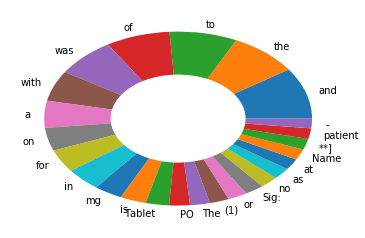

In [52]:
stopwords,count = map(list, zip(*freq50))
print(stopwords,count)
from matplotlib import cm
my_circle=plt.Circle( (0,0), 0.5, color='white')
cs=cm.Set1(np.arange(50)/50.)
plt.pie(count[:25], labels=stopwords[:25])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



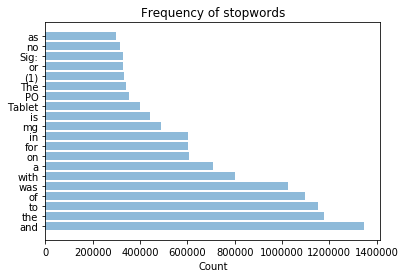

In [53]:
plt.barh(np.arange(len(stopwords[:20])),count[:20],align='center',alpha=0.5)
plt.yticks(np.arange(len(stopwords[:20])),stopwords[:20])
plt.xlabel('Count')
plt.title('Frequency of stopwords')
plt.show()

## Next to be tried with TreeMap if possible or come up with better donut plots


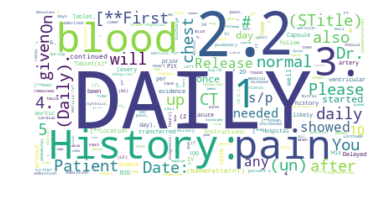

['and', 'the', 'to', 'of', 'was', 'with', 'a', 'on', 'for', 'in', 'mg', 'is', 'Tablet', 'PO', 'The', '(1)', 'or', 'Sig:', 'no', 'as', 'at', 'Name', '**]', 'patient', '-', 'One', '.', 'BLOOD', 'He', 'Discharge', 'were', 'No', 'his', 'She', 'left', '[**Last', 'had', 'be', 'her', 'your', 'not', 'by', 'he', 'that', 'right', 'from', 'an', 'are', 'have', 'she', 'but', 'which', 'has', 'this', 'There', 'day', '[**Hospital1', 'times', '1.', 'you']


In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
for i in stopwords:
    del words[i]
wordcloud = WordCloud(stopwords=stopwords,background_color="white")

wordcloud.generate_from_frequencies(frequencies=words)
plt.figure()
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
print(stopwords)

In [67]:
wordcloud.to_file("first_review.png")


In [ ]:

# fit our vectorizer. This will take a while depending on your computer. 
print(len(df_train),len(df_test))
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better,stop_words=st
# this could take a while
vect.fit(df_train.TEXT.values)
X_train_tf = vect.transform(df_train.TEXT.values)
X_test_tf = vect.transform(df_test.TEXT.values)

In [ ]:
print(X_train_tf.shape,df_train_class.shape)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind='svm',random_state=42)

df_train_sam,df_train_sam_class = sm.fit_sample(X_train_tf,df_train_class)

In [ ]:
df_train_sam.shape

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf.fit(df_train_sam,df_train_sam_class)

In [ ]:
model = clf
y_train_preds = model.predict_proba(df_train_sam)[:,1]
y_valid_preds = model.predict_proba(X_test_tf)[:,1]

In [ ]:
y_valid_preds[17]

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df_train_class,model.predict(X_train_tf))

In [ ]:
roc_auc_score(df_test_class,model.predict(X_test_tf))

In [ ]:
from sklearn.metrics import average_precision_score,recall_score
#precision_score(df_train_class,model.predict(df_train_sam))
average_precision_score(df_train_class,model.predict(X_train_tf))

In [ ]:
len(list(df_train_class[df_train_class==0]))